In [7]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [8]:
class AgentState(TypedDict):
    number1 : int
    operation : str
    number2 : int
    result : int

In [18]:
def adder(state: AgentState) -> AgentState:
    """This node adds two numbers."""
    state['result'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts two numbers."""
    state['result'] = state['number1'] - state['number2']
    return state    

def decide_next_node(state: AgentState) -> AgentState:
    """this node will select the next node of the graph"""
    if state['operation'] == '+':
        return "addition_operation"
    elif state['operation'] == '-':
        return "subtraction_operation"
    

In [19]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")

graph.add_conditional_edges(    
    "router",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()


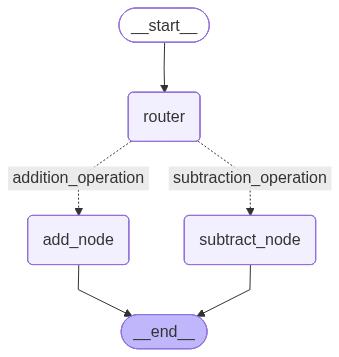

In [20]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
initial_state_1= AgentState(number1=10, operation="-", number2=5, result=0)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'result': 5}
